In [2]:
import logging
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# disable scikit-learn warnings
logger = logging.getLogger('sklearn')
logger.setLevel(logging.ERROR)

import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

detail_url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/playlists/low_details.json'

video_details = requests.get(detail_url).json()

eye_url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/features/eye_tracking/eye_tracking.gzip.parquet'

df = pd.read_parquet(eye_url)

#columns = ['frame_index', 'progress', 'eye_x', 'eye_y']

# set column names
# df.columns = columns

df.sort_values(by=['progress'], inplace=True)

# if duration is 1 minute 10 seconds, get progress_secs column
df['progress_secs'] = df['progress'] * float(video_details['format']['duration'])


df['true_x'] = df['eye_x'] * video_details['streams'][0]['width']
df['true_y'] = df['eye_y'] * video_details['streams'][0]['height']

df

,progress,eye_x,eye_y,progress_secs,true_x,true_y
0,3.640777e-07,0.037497,0.918590,0.000025,71.994026,992.076714
1,5.840971e-04,0.049825,0.905528,0.039456,95.664704,977.970319
2,1.213573e-03,0.058277,0.905399,0.081977,111.891105,977.830419
3,1.798660e-03,0.067983,0.909321,0.121499,130.527208,982.066648
4,2.382437e-03,0.042592,0.941887,0.160934,81.776300,1017.238239
...,...,...,...,...,...,...
1627,9.975233e-01,0.533198,0.340407,67.382698,1023.739597,367.639689
1628,9.981646e-01,0.540227,0.360381,67.426020,1037.235194,389.211002
1629,9.987713e-01,0.547215,0.385601,67.467001,1050.652846,416.449541
1630,9.993781e-01,0.567614,0.384825,67.507990,1089.818181,415.610479


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import seaborn as sns

def kmeans_inertia(scaled_data, k, alpha_k=0.02):
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia


def best_kmeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kmeans_inertia(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


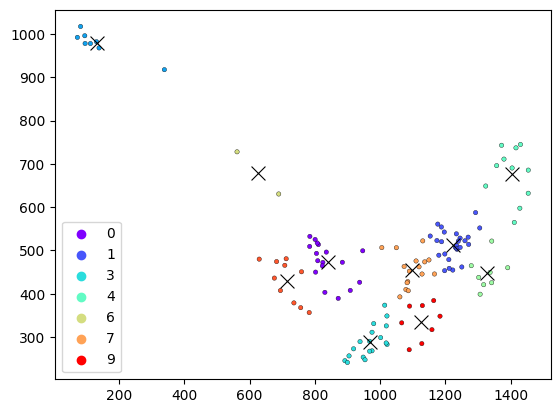

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


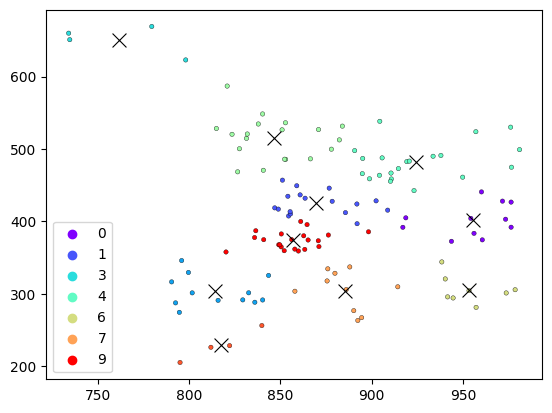

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


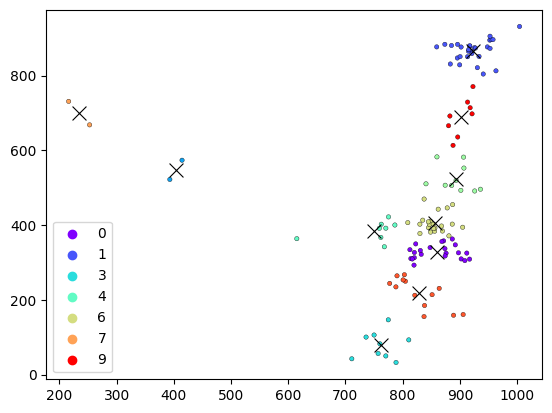

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


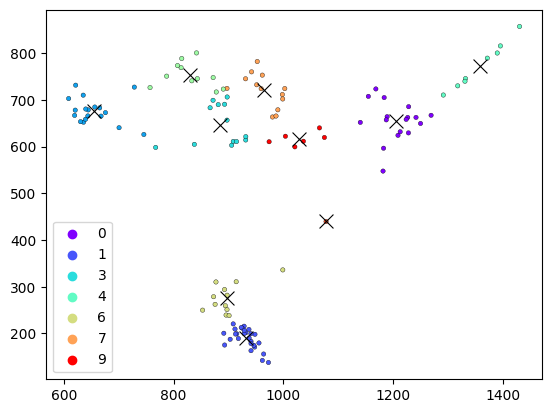

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


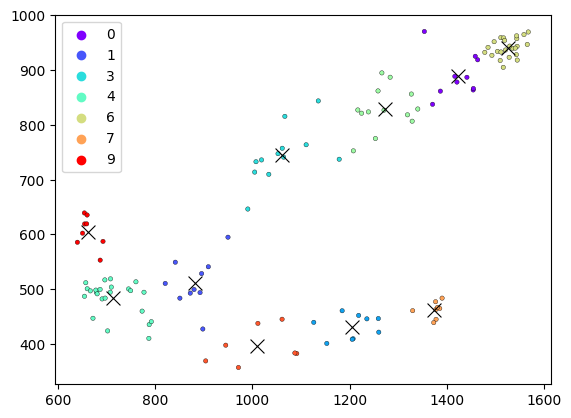

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


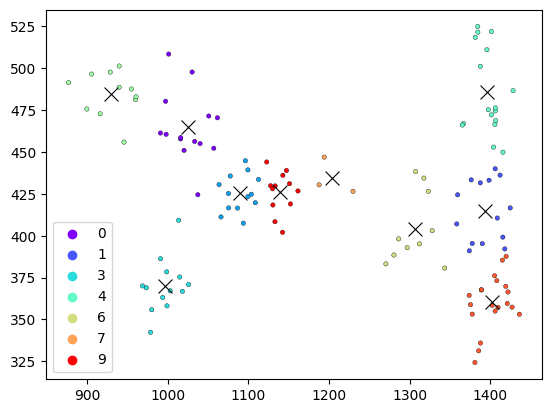

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


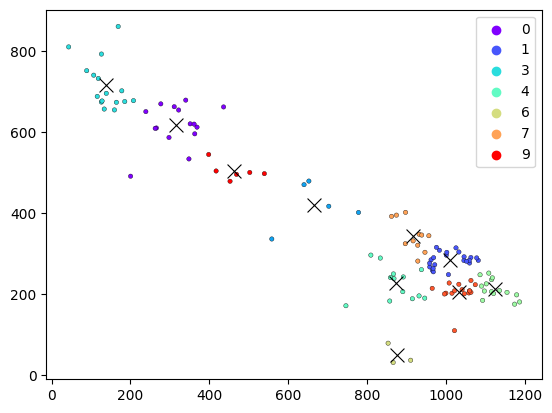

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


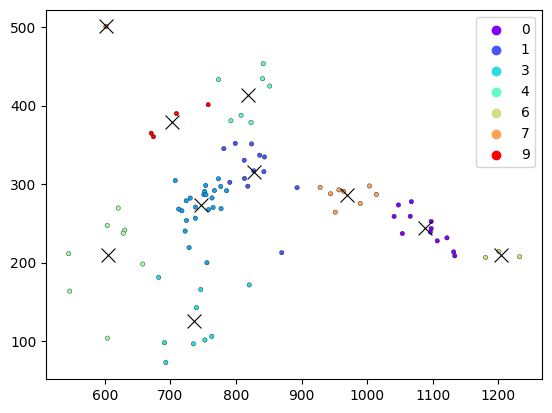

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


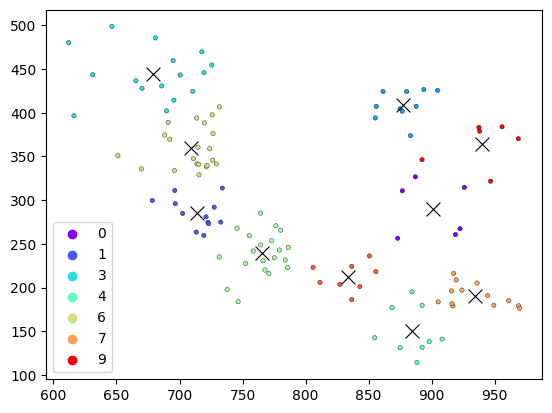

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


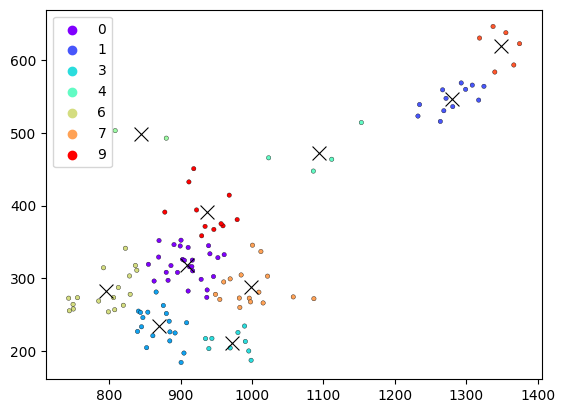

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


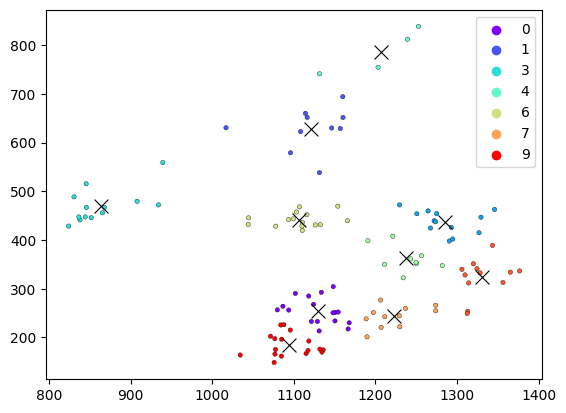

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


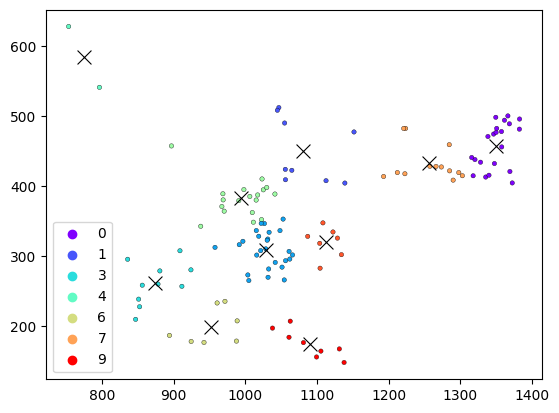

/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


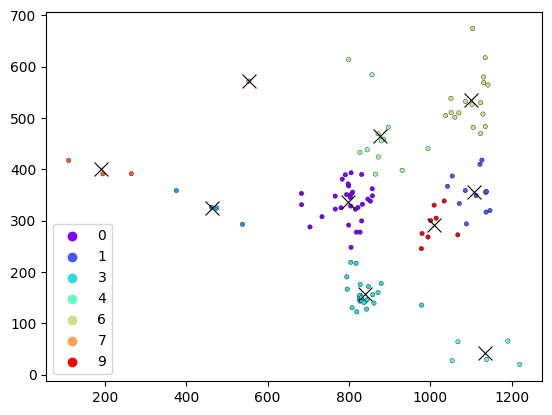

progress_secs
(0.0, 5.0]      [[838.9871880317161, 473.5822434807385], [1224...
(5.0, 10.0]     [[955.3105312404632, 402.08168805950385], [869...
(10.0, 15.0]    [[859.9383473495974, 327.49101347261626], [922...
(15.0, 20.0]    [[1204.6749021113706, 654.1004728099613], [931...
(20.0, 25.0]    [[1422.15853630704, 889.406000418714], [880.70...
(25.0, 30.0]    [[1024.955877962202, 464.71246427579877], [139...
(30.0, 35.0]    [[316.58566984415467, 616.6481604192525], [101...
(35.0, 40.0]    [[1088.4112011875743, 243.46150933828704], [82...
(40.0, 45.0]    [[900.69010457243, 289.44026233681956], [713.9...
(45.0, 50.0]    [[908.4233661595223, 319.1346212648492], [1279...
(50.0, 55.0]    [[1129.8172869600505, 254.86597520400187], [11...
(55.0, 60.0]    [[1350.481060587583, 457.7731944047915], [1080...
(60.0, 65.0]    [[796.8125348606847, 335.34196123367826], [110...
dtype: object

In [4]:
# group every 5 seconds
def cluster(subdf):
    scaler = StandardScaler()

    x = subdf[['true_x', 'true_y']].values
    #x = scaler.fit_transform(x)
    
    #best_k, _ = best_kmeans(x, range(2, 5))

    model = KMeans(n_clusters=10, random_state=42)
    model.fit(x)
    
    sns.scatterplot(
        x=x[:,0],
        y=x[:,1],
        hue=model.labels_,
        s=10,
        edgecolor='black',
        palette='rainbow',
    )
    sns.scatterplot(
        x=model.cluster_centers_[:,0],
        y=model.cluster_centers_[:,1],
        s=100,
        color='black',
        marker='x',
        edgecolor='black',
    )
    plt.show()

    return model.cluster_centers_

video_duration = float(video_details['format']['duration'])

groups = df\
    .groupby(pd.cut(df['progress_secs'], np.arange(0, video_duration, 5)))\
    .apply(cluster)
    
groups

#for group in groups:
#    subdf = group[1]
    
    # sns.scatterplot(
    #     x=x[:,0],
    #     y=x[:,1],
    #     hue=model.labels_,
    #     s=10,
    #     edgecolor='black',
    #     palette='rainbow',
    # )
    # sns.scatterplot(
    #     x=model.cluster_centers_[:,0],
    #     y=model.cluster_centers_[:,1],
    #     s=100,
    #     color='black',
    #     marker='x',
    #     edgecolor='black',
    # )
        
    # plt.show()

In [9]:
import cv2 

video_url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/playlists/low.m3u8'

capture = cv2.VideoCapture(video_url)

group_index = 0

# play video at native speed
while capture.isOpened():
    success, frame = capture.read()

    if not success:
        break
        
    # get current progress
    progress = capture.get(cv2.CAP_PROP_POS_MSEC) / 1000
    
    if group_index+1 < len(groups) and progress >= groups.index[group_index+1].left:
        group_index += 1
        print(group_index, groups.index[group_index].left)
        
    # get current cluster
    group = groups.iloc[group_index]
    
    for point in group:
        x = point[0]
        y = point[1]
        # draw circle at point
        cv2.circle(frame, (int(x), int(y)), 10, (0, 0, 255), -1)
    
    # cv2.imshow('frame', frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/jack/.local/share/virtualenvs/datadev-5ox7fytP/lib/python3.10/site-packages/cv2/qt/plugins"


1 5.0
2 10.0
3 15.0
4 20.0
5 25.0
6 30.0
7 35.0
8 40.0
9 45.0
10 50.0
11 55.0
12 60.0


: 